# This is a Deep Learning based binary classifier that predicts if a picture is of a dog or a cat.

### It uses a convolutional neural network for the prediction and prediction accuracy is improved over iterations mentioned below.

#### 1. Building baseline model with simple convolutional network

#### 2. Improving accuracy by applying dropout and data augmentation

#### 3. Improving accuracy further by using pretrained model, and performing
    a) fast feature extraction (without data augmentation) and
    b) feature extraction with data augmentation
   
#### 4. Improving accuracy even further by applying fine-tuning on pretrained model


In [2]:
# Imports important packages

from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

### Building baseline model with simple convolutional network¶

In [3]:
# Creates initial convolution network from scratch

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [4]:
# Checks for model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [6]:
# Compiles the above ConvNet model

model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=["acc"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
# Sets images path for both training and validation images, and creates respective image data generators

train_dir = os.path.join(os.getcwd(), "Data", "train")
val_dir = os.path.join(os.getcwd(), "Data", "validation")

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode="binary")

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    val_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
# Fits model

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                             validation_data=val_generator, validation_steps=50)


Epoch 1/30
100/100 [==============================] - 46s 461ms/step - loss: 0.6918 - acc: 0.5090 - val_loss: 0.6446 - val_acc: 0.5800
Epoch 2/30
100/100 [==============================] - 47s 467ms/step - loss: 0.6570 - acc: 0.6125 - val_loss: 0.7031 - val_acc: 0.5900
Epoch 3/30
100/100 [==============================] - 48s 478ms/step - loss: 0.6146 - acc: 0.6685 - val_loss: 0.5187 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 53s 526ms/step - loss: 0.5767 - acc: 0.6975 - val_loss: 0.5541 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 57s 565ms/step - loss: 0.5425 - acc: 0.7165 - val_loss: 0.7397 - val_acc: 0.6660
Epoch 6/30
100/100 [==============================] - 57s 567ms/step - loss: 0.5171 - acc: 0.7490 - val_loss: 0.5425 - val_acc: 0.6530
Epoch 7/30
100/100 [==============================] - 56s 563ms/step - loss: 0.4920 - acc: 0.7630 - val_loss: 0.5932 - val_acc: 0.6730
Epoch 8/30
100/100 [==============================] - 

In [19]:
# Saves the entire trained model into HDF5 file format.

model.save("dogs_vs._cats_prediction_baselined_model.h5")

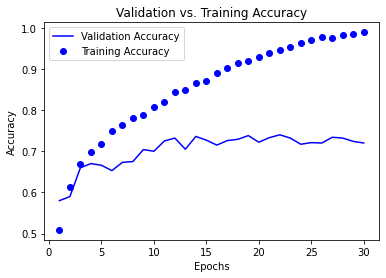

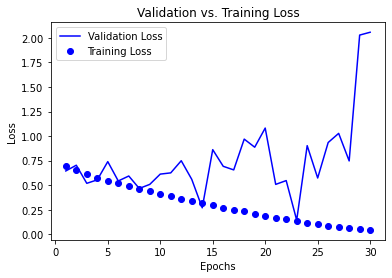

In [24]:
# Plots the loss and accuracy over training and validation data

epochs = len(history.history["acc"])
val_accuracy = history.history["val_acc"]
train_accuracy = history.history["acc"]
val_loss = history.history["val_loss"]
train_loss = history.history["loss"]

plt.plot(range(1, epochs+1), val_accuracy, "b", label="Validation Accuracy")
plt.plot(range(1, epochs+1), train_accuracy, "bo", label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation vs. Training Accuracy")
plt.figure()

plt.plot(range(1, epochs+1), val_loss, "b", label="Validation Loss")
plt.plot(range(1, epochs+1), train_loss, "bo", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation vs. Training Loss")
plt.show()

In [27]:
# From the above plots, it is evident that training accuracy increased linearly and reached to 100%
# where validation accuracy did not reach beyond 70-72%. Also training loss decreased and reached to 0
# where kept fluctualing over a large margin. Considering these as characteristics of overfitting, let's
# get into next iteration to fight this overfitting.

### Improving Accuracy by Applying Dropout and Data Augmentation¶

In [28]:
# Create convolution neural network once again, but with a dropout layer this time.

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [29]:
# Checks for dropout layer in the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [30]:
# Compiles the above ConvNet model

model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=["acc"])

In [31]:
# Creates data generator for training images by passing data augmentation parameters.
# This is to be noted that data generator for validation images must not be augmented. 

train_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode="nearest").flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=32,
                    class_mode="binary")

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    val_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
# Fits model

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                             validation_data=val_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 73s 732ms/step - loss: 0.6900 - acc: 0.5380 - val_loss: 0.6714 - val_acc: 0.5920
Epoch 2/100
100/100 [==============================] - 74s 744ms/step - loss: 0.6793 - acc: 0.5780 - val_loss: 0.6447 - val_acc: 0.6050
Epoch 3/100
100/100 [==============================] - 89s 895ms/step - loss: 0.6597 - acc: 0.6070 - val_loss: 0.6154 - val_acc: 0.5620
Epoch 4/100
100/100 [==============================] - 90s 899ms/step - loss: 0.6439 - acc: 0.6196 - val_loss: 0.5802 - val_acc: 0.6280
Epoch 5/100
100/100 [==============================] - 90s 895ms/step - loss: 0.6340 - acc: 0.6291 - val_loss: 0.6827 - val_acc: 0.6690
Epoch 6/100
100/100 [==============================] - 92s 919ms/step - loss: 0.6113 - acc: 0.6680 - val_loss: 0.7718 - val_acc: 0.6510
Epoch 7/100
100/100 [==============================] - 90s 901ms/step - loss: 0.5968 - acc: 0.6754 - val_loss: 0.4808 - val_acc: 0.6780
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 88s 883ms/step - loss: 0.4082 - acc: 0.8122 - val_loss: 0.5367 - val_acc: 0.7880
Epoch 62/100
100/100 [==============================] - 88s 878ms/step - loss: 0.4039 - acc: 0.8131 - val_loss: 0.7315 - val_acc: 0.7710
Epoch 63/100
100/100 [==============================] - 87s 874ms/step - loss: 0.4066 - acc: 0.8131 - val_loss: 0.3181 - val_acc: 0.8160
Epoch 64/100
100/100 [==============================] - 87s 874ms/step - loss: 0.4155 - acc: 0.8002 - val_loss: 0.3204 - val_acc: 0.7920
Epoch 65/100
100/100 [==============================] - 88s 878ms/step - loss: 0.3986 - acc: 0.8084 - val_loss: 0.3456 - val_acc: 0.7990
Epoch 66/100
100/100 [==============================] - 87s 874ms/step - loss: 0.3900 - acc: 0.8280 - val_loss: 0.2164 - val_acc: 0.8080
Epoch 67/100
100/100 [==============================] - 88s 877ms/step - loss: 0.4072 - acc: 0.8150 - val_loss: 0.3895 - val_acc: 0.7990
Epoch 68/100
100/100 [===================

In [33]:
# Saves the entire trained model into HDF5 file format.

model.save("dogs_vs._cats_prediction_model_with_dropout_and_data_augmentation.h5")

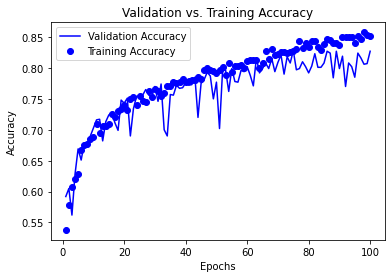

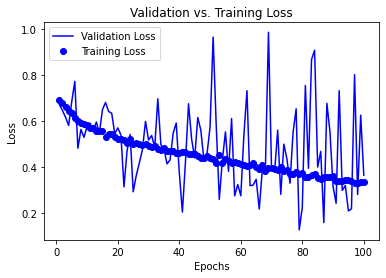

In [34]:
# Plots the loss and accuracy over training and validation data

epochs = len(history.history["acc"])
val_accuracy = history.history["val_acc"]
train_accuracy = history.history["acc"]
val_loss = history.history["val_loss"]
train_loss = history.history["loss"]

plt.plot(range(1, epochs+1), val_accuracy, "b", label="Validation Accuracy")
plt.plot(range(1, epochs+1), train_accuracy, "bo", label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation vs. Training Accuracy")
plt.figure()

plt.plot(range(1, epochs+1), val_loss, "b", label="Validation Loss")
plt.plot(range(1, epochs+1), train_loss, "bo", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation vs. Training Loss")
plt.show()

### 3. Improving Accuracy Further by Using Pretrained Model

    a) Fast Feature Extraction (without data augmentation)

In [3]:
# Imports relevant package to use the pretrained model

from keras.applications import VGG16

In [4]:
# Creates base of the model pretrained on ImageNet

vgg16_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

In [33]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [9]:
image_batch_size = 20

In [12]:
def extract_features(image_dir, image_batch_size, sample_count):
    generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    image_dir,
                    target_size=(150, 150),
                    batch_size=image_batch_size,
                    class_mode="binary")
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    i = 0
    for image_batch, labels_batch in generator:
        features_batch = vgg16_base.predict(image_batch)
        features[i * image_batch_size :(i + 1) * image_batch_size] = features_batch
        labels[ i * image_batch_size : (i + 1) * image_batch_size] = labels_batch
        i += 1
        if (i * image_batch_size) >= sample_count:
            break
    return features, labels

In [13]:
train_dir = os.path.join(os.getcwd(), "Data", "train")
val_dir = os.path.join(os.getcwd(), "Data", "validation")

In [15]:
val_dir

'/home/pradip/Development/GettingStarted/Deep_Learning/Dogs_vs._Cats_Prediction/Data/validation'

In [17]:
train_features, train_labels = extract_features(train_dir, image_batch_size, 2000)

Found 2000 images belonging to 2 classes.



In [18]:
val_features, val_labels = extract_features(val_dir, image_batch_size, 1000)

Found 1000 images belonging to 2 classes.


In [22]:
train_features = np.reshape(train_features, (
    train_features.shape[0], 
    train_features.shape[1] * train_features.shape[2] * train_features.shape[3]))

In [23]:
val_features = np.reshape(val_features, (
    val_features.shape[0], 
    val_features.shape[1] * val_features.shape[2] * val_features.shape[3]))

In [28]:
model = models.Sequential()
model.add(layers.Dense(256, activation="relu", input_dim=train_features.shape[1]))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

In [29]:
# Checks for model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compiles the above dense fully connected network model

model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=["acc"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
# Fits model

history = model.fit(train_features, train_labels, batch_size = 20,
                    epochs = 30, validation_data = (val_features, val_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6137 - acc: 0.6640 - val_loss: 0.4460 - val_acc: 0.8290
Epoch 2/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.4249 - acc: 0.8150 - val_loss: 0.3676 - val_acc: 0.8550
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3460 - acc: 0.8570 - val_loss: 0.3276 - val_acc: 0.8700
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3091 - acc: 0.8700 - val_loss: 0.3158 - val_acc: 0.8650
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2813 - acc: 0.8870 - val_loss: 0.2867 - val_acc: 0.8850
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2642 - acc: 0.8905 - val_loss: 0.2754 - val_acc: 0.8920
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2418 - acc: 0.9100 - val_loss: 0.2669 - val_acc: 0.8910
Epoch 8/30
200

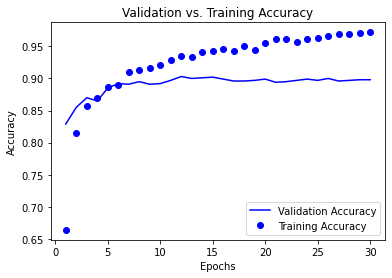

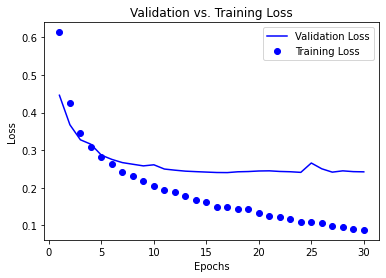

In [32]:
# Plots the loss and accuracy over training and validation data

epochs = len(history.history["acc"])
val_accuracy = history.history["val_acc"]
train_accuracy = history.history["acc"]
val_loss = history.history["val_loss"]
train_loss = history.history["loss"]

plt.plot(range(1, epochs+1), val_accuracy, "b", label="Validation Accuracy")
plt.plot(range(1, epochs+1), train_accuracy, "bo", label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation vs. Training Accuracy")
plt.figure()

plt.plot(range(1, epochs+1), val_loss, "b", label="Validation Loss")
plt.plot(range(1, epochs+1), train_loss, "bo", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation vs. Training Loss")
plt.show()

It is evident from the above plots that average validation accuracy is around 90% with pretrained model without data augmentation.

#### b) Fast Feature Extraction with Data Augmentation

In [34]:
# Creates a new model out of pretrained base model and adds dense fully connected
# layer for binary classification

model = models.Sequential()
model.add(vgg16_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [35]:
# Checks for model summary

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Freezes convolutional base before starting training

vgg16_base.trainable = False

In [41]:
train_dir = os.path.join(os.getcwd(), "Data", "train")
val_dir = os.path.join(os.getcwd(), "Data", "validation")

In [42]:
# Creates data generator for training images by passing data augmentation parameters.
# This is to be noted that data generator for validation images must not be augmented. 

train_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode="nearest").flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode="binary")

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    val_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Fits model

history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, 
                              validation_data=val_generator, validation_steps = 50)

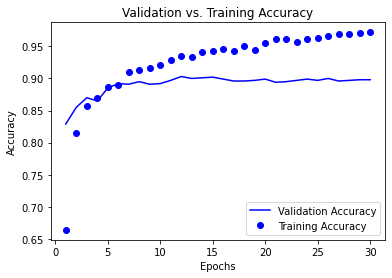

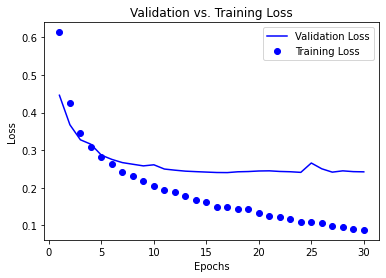

In [32]:
# Plots the loss and accuracy over training and validation data

epochs = len(history.history["acc"])
val_accuracy = history.history["val_acc"]
train_accuracy = history.history["acc"]
val_loss = history.history["val_loss"]
train_loss = history.history["loss"]

plt.plot(range(1, epochs+1), val_accuracy, "b", label="Validation Accuracy")
plt.plot(range(1, epochs+1), train_accuracy, "bo", label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation vs. Training Accuracy")
plt.figure()

plt.plot(range(1, epochs+1), val_loss, "b", label="Validation Loss")
plt.plot(range(1, epochs+1), train_loss, "bo", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation vs. Training Loss")
plt.show()

### 4. Improving Accuracy Even Further by Fine Tuning on Pretrained Model